In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import (line, polygon, disk,
                          circle_perimeter,
                          ellipse, ellipse_perimeter,
                          bezier_curve)


fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(10, 6))


img = np.zeros((500, 500, 4), dtype=np.double)

# fill polygon
poly = np.array((
    (300, 300),
    (480, 320),
    (380, 430),
    (300, 300),
))
rr, cc = polygon(poly[:, 0], poly[:, 1], img.shape)
img[rr, cc, :] = (0.8,0.8,0, 0.9)

# fill circle
rr, cc = disk((200, 200), 100, shape=img.shape)
img[rr, cc, :] = (1, 1, 0, 0.8)

# fill ellipse
rr, cc = ellipse(300, 300, 100, 200, img.shape)
img[rr, cc, :] = (0,0.8,0, 0.1)

# ellipses
rr, cc = ellipse_perimeter(120, 400, 60, 20, orientation=math.pi / 4.)
img[rr, cc, :] = (1, 0, 1, 0.5)
rr, cc = ellipse_perimeter(120, 400, 60, 20, orientation=-math.pi / 4.)
img[rr, cc, :] = (0, 0, 1, 0.5)
rr, cc = ellipse_perimeter(120, 400, 60, 20, orientation=math.pi / 2.)
img[rr, cc, :] = (1, 1, 1, 0.5)

rr, cc = bezier_curve(1, 5, 5, -2, 8, 8, 2)
img[rr, cc] = 1

ax1.imshow(img)
plt.show()



In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

n = 8 # Number of possibly sharp edges
r = .7 # magnitude of the perturbation from the unit circle,
# should be between 0 and 1
N = n*3+1 # number of points in the Path
# There is the initial point and 3 points per cubic bezier curve. Thus, the curve will only pass though n points, which will be the sharp edges, the other 2 modify the shape of the bezier curve

angles = np.linspace(0,2*np.pi,N)
codes = np.full(N,Path.CURVE4)
codes[0] = Path.MOVETO

verts = np.stack((np.cos(angles),np.sin(angles))).T*(2*r*np.random.random(N)+1-r)[:,None]
verts[-1,:] = verts[0,:] # Using this instad of Path.CLOSEPOLY avoids an innecessary straight line
path = Path(verts, codes)

fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='#999', alpha=0.20, lw=2)
ax.add_patch(patch)

ax.set_xlim(np.min(verts)*1.1, np.max(verts)*1.1)
ax.set_ylim(np.min(verts)*1.1, np.max(verts)*1.1)
ax.axis('off') # removes the axis to leave only the shape

plt.show()

In [ ]:
# import importlib
# import drawer
# importlib.reload(drawer)
#
# drawer = drawer.Drawer()
# drawer.draw_polygon()
# drawer.draw_circle()
# drawer.draw_ellipse()
# drawer.show()


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import (line, polygon, disk,
                          circle_perimeter,
                          ellipse, ellipse_perimeter,
                          bezier_curve, circle)

class DrawerM:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.img = np.zeros((x, y, 3), dtype=np.double)
        fig, (ax) = plt.subplots(ncols=1, nrows=1, figsize=(10, 6))
        self.ax = ax

    def __blend(self, rrcc, new_rgb, opacity):
        rr, cc = rrcc
        def get_blended(orig_v, new_v, __opacity):
            return (orig_v * (1- __opacity)) + (new_v * __opacity / 255)
        for i in range(3):
            self.img[rr, cc, i] = get_blended(self.img[rr, cc, i], new_rgb[i], opacity)

    def draw_ellipse(self, ellipse_args, color, opacity):
        rrcc = ellipse(r=ellipse_args[0], c=ellipse_args[1], r_radius=ellipse_args[2], c_radius=ellipse_args[3], shape=self.img.shape, rotation=ellipse_args[4])
        self.__blend(rrcc, color, opacity)

    def draw_polygon(self, rrcc_tup, color, opacity):
        rrcc_arr = np.array(rrcc_tup)
        rrcc = polygon(poly[:, 0], poly[:, 1], self.img.shape)
        self.__blend(rrcc, color, opacity)

    def show(self):
        self.ax.imshow(self.img)
        plt.show()


In [ ]:
drawer = DrawerM(500, 500)
drawer.draw_polygon((
            (300, 300),
            (480, 320),
            (380, 430),
            (300, 300),
        ), (0, 155, 155), opacity = 1)
drawer.draw_ellipse([200, 200, 100, 100, 0.2], (255, 122, 0), opacity=1)
drawer.draw_ellipse([300, 300, 100, 300, 0.2], (0, 0, 150), opacity=0.5)
drawer.show()


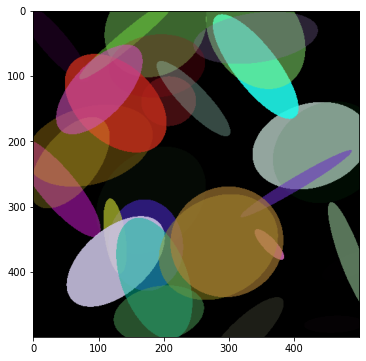

In [28]:
drawer = DrawerM(500, 500)
for i in range(30):
    rrcc = np.append(np.random.randint(500, size=2),
        np.random.randint(10, 100, size=2))
    rrcc = np.append(rrcc, np.random.rand(1,1))
    drawer.draw_ellipse(rrcc, np.random.randint(255, size=3), np.random.rand(1,1)[0])

drawer.show()